In [1]:
pip install toolz 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [6]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from collections import Counter


In [7]:
def contour_f(data,contourdata,levels=np.arange(0,11),ccmap='PuBu',extend='max',limite_NS=42,clevels=np.arange(230,300,15),titulo='OLR y pr',cbarlabel='pr  [mm day$^{-1}$]'):
    lons,lats=data.lon,data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    contourdata, lon = add_cyclic_point(contourdata, coord=lons)
    fig = plt.figure(figsize=(10, 6))

    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
    cc=ax.contour(lon,lats,contourdata,levels=clevels,colors='k',transform=ccrs.PlateCarree())

    ax.clabel(cc, cc.levels, inline=True, fontsize=10)

    ax.set_extent([-180,180, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo,fontsize=13)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

### **<font color="Purple"> Datos de ERA-5 </font>**

In [8]:
filet2m_era5 = 'datasets/t2m_dailyC.nc'

In [9]:
t2m_ds=xr.open_dataset(filet2m_era5)
t2m=t2m_ds['t2m']

In [10]:
# Calcular promedio estacional
t2m_estacion=t2m.groupby(t2m.time.dt.season).mean(dim='time') 

In [11]:
t2m_anual = t2m.groupby(t2m.time.dt.year).mean(dim='time').mean(dim='year')

In [12]:
#seleccionar inviernos
invs_E5 = t2m_estacion[0]

In [13]:
#Desviacion de temperatura
desvanualE5=t2m.groupby(t2m.time.dt.year).std(dim='time').mean(dim='year') # Desviación de temperatura anual
desvseasonE5=t2m.groupby(t2m.time.dt.season).std(dim='time') # Desviación de temperatura por estación

In [14]:
latsE5_t=t2m.latitude
lonsE5_t=t2m.longitude

In [15]:
t2m_inviernosE5 = t2m.sel(time=t2m['time.month'].isin([12, 1, 2]))

In [16]:
anomaliaE5=desvseasonE5[0]-desvanualE5

In [17]:
anomaliachingonaE5=invs_E5-t2m_anual

### **<font color="Purple"> Datos de HadGEM3 </font>**

In [18]:
tas_file = 'datasets/tasday79.nc'

In [19]:
#archivo historical
tas_ds=xr.open_dataset(tas_file)
tas=tas_ds['tas']

In [20]:
latsHG_t=tas.lat
lonsHG_t=tas.lon

In [21]:
# Promedio de temperatura por estación 
tas_estacion=tas.groupby(tas.time.dt.season).mean(dim='time') 
tas_anual = tas.groupby(tas.time.dt.year).mean(dim='time').mean(dim='year')
invs_HG = tas_estacion[0]

In [22]:
#Desviacion de temperatura
desvanualHG=tas.groupby(tas.time.dt.year).std(dim='time').mean(dim='year') # Desviación de temperatura anual
desvseasonHG=tas.groupby(tas.time.dt.season).std(dim='time') # Desviación de temperatura por estación

In [23]:
tas_inviernosHG = tas.sel(time=tas['time.month'].isin([12, 1, 2]))

In [24]:
std_invsHG = tas_inviernosHG.std(dim='time')

In [25]:
anomaliaHG=desvseasonHG[0]-desvanualHG
anomaliachingona=invs_HG-tas_anual

----
## **<font color="crimson"> HadGEM3 vs ERA-5 (anual) </font>**

###### <h1  style="color:purple; font-size:20px;"><i> Climatología de temperatura superficial </i> </h1>

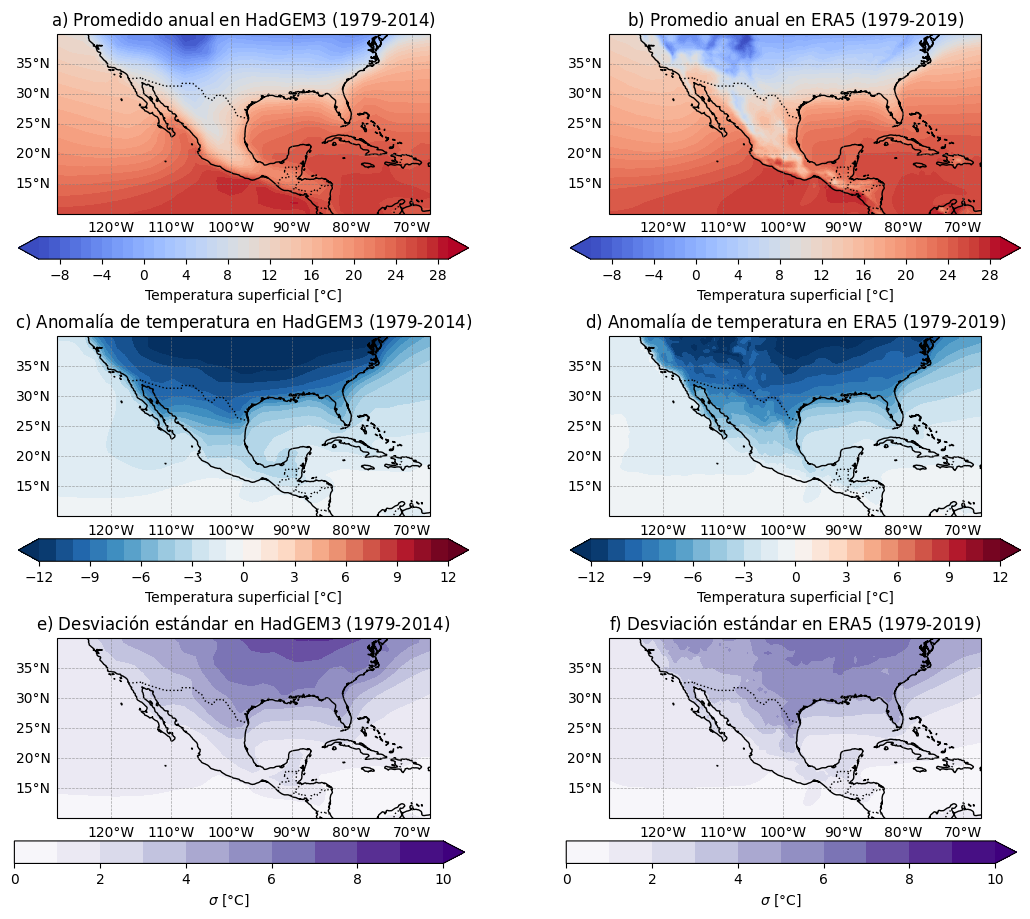

In [28]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})#, constrained_layout=True)
axs = axs.flatten()
plt.subplots_adjust(wspace=0.1,hspace=0.7)

# Gráfico 1: Temperatura DJF HadGEM
ax = axs[0]
ax.coastlines()
invsHG, lon = add_cyclic_point(invs_HG, coord=lonsHG_t)
cs1 = ax.contourf(lon, latsHG_t, invsHG, levels=np.arange(-10, 30, 1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
ax.set_title('a$)$ Promedido anual en HadGEM3 (1979-2014)', fontsize=12)
fig.colorbar(cs1, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1, label='Temperatura superficial [°C]')

# Gráfico 2: Anomalía de temperatura DJF HadGEM
ax = axs[2]
ax.coastlines()
anomalia_HG, lon = add_cyclic_point(anomaliachingona, coord=lonsHG_t)
cs2 = ax.contourf(lon, latsHG_t, anomalia_HG, levels=np.arange(-12, 12.25, 1), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
ax.set_title('c$)$ Anomalía de temperatura en HadGEM3 (1979-2014)', fontsize=12)
fig.colorbar(cs2, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1, label='Temperatura superficial [°C]')

# Gráfico 3: Desviación estándar DJF HadGEM
ax = axs[4]
ax.coastlines()
datadesv_a, lon = add_cyclic_point(std_invsHG, coord=lonsHG_t)
cs3 = ax.contourf(lon, latsHG_t, datadesv_a, levels=np.arange(0, 11, 1), cmap='Purples', extend='max', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
ax.set_title('e$)$ Desviación estándar en HadGEM3 (1979-2014)', fontsize=12)
fig.colorbar(cs3, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1, label=r'$\sigma$ [°C]')

# Gráfico 4: Temperatura DJF ERA5
ax = axs[1]
ax.coastlines()
cs4 = ax.contourf(lonsE5_t, latsE5_t, invs_E5, levels=np.arange(-10, 30, 1), cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
ax.set_title('b$)$ Promedio anual en ERA5 (1979-2019)', fontsize=12)
fig.colorbar(cs4, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1, label='Temperatura superficial [°C]')

# Gráfico 5: Anomalía de temperatura DJF ERA5
ax = axs[3]
ax.coastlines()
cs5 = ax.contourf(lonsE5_t, latsE5_t, anomaliachingonaE5, levels=np.arange(-12, 12.25, 1), cmap='RdBu_r', extend='both', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
ax.set_title('d$)$ Anomalía de temperatura en ERA5 (1979-2019)', fontsize=12)
fig.colorbar(cs5, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1, label='Temperatura superficial [°C]')

# Gráfico 6: Desviación estándar DJF ERA5
ax = axs[5]
ax.coastlines()
cs6 = ax.contourf(lonsE5_t, latsE5_t, desvseasonE5[0], levels=np.arange(0, 11, 1), cmap='Purples', extend='max', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.set_extent([231, 293, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
ax.set_title('f$)$ Desviación estándar en ERA5 (1979-2019)', fontsize=12)
fig.colorbar(cs6, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1, label=r'$\sigma$ [°C]')

plt.tight_layout()
plt.subplots_adjust(top=.89)
# plt.suptitle('Temperatura superficial diaria en DJF',fontsize=14,color="k",fontstyle='italic',fontweight='bold');
#plt.show()


plt.savefig('figs/5_Temperatura.png')

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Anual </i> </h1>

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Invierno </i> </h1>

#### <h1  style="color:purple; font-size:20px;"><i> Desviación estándar de temperatura superficial </i> </h1>

In [27]:
anual=tas79.groupby(tas79.time.dt.year).std(dim='time').mean(dim='year') # Desviación de temperatura anual
######### esto esta bien? ^^^^
desv=tas79.groupby(tas79.time.dt.season).std(dim='time') # Desviación de temperatura por estación
desv_inv=desv[0]

NameError: name 'tas79' is not defined

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Anual </i> </h1>

In [ ]:
fig = plt.figure(figsize=(10, 7), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
datadesv_a, lon = add_cyclic_point(anual, coord=lons)
cs=ax.contourf(lon,lats,datadesv_a,levels=np.arange(0,15,0.5),cmap='Purples',extend='max',transform=ccrs.PlateCarree()) #temperatura
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
cbar.ax.set_xlabel(r'$\sigma$ de temperatura superficial [°C]', fontsize=14)
plt.title('Desviación estándar (anual) de temperatura diaria superficial \n Simulación histórica (1979-2014)',fontsize=17)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Estacional </i> </h1>

In [ ]:
fig = plt.figure(figsize=(10,7),dpi=120)
plt.subplots_adjust(wspace=0.35, hspace=0.35)

orden_n = ["DJF","MAM","JJA","SON"]

for iseason,season in enumerate(orden_n):
    desv_temp=desv.sel(season=season)
    
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    ax.coastlines()

    datadesv, lon = add_cyclic_point(desv_temp, coord=lons)
    
    cs=ax.contourf(lon,lats,datadesv,levels=np.arange(0,10,0.2),cmap='Purples',extend='max',transform=ccrs.PlateCarree()) #temperatura
   
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--',linewidth=0.7)
    ax.xlabels_top = False
    gl.top_labels = gl.right_labels = False
    plt.minorticks_on()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel(r'$\sigma$ de temperatura superficial [°C]', fontsize=11)
    plt.title(season,fontsize=14)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Anomalía (anual vs estacional) </i> </h1>

In [ ]:
#### anual
fig = plt.figure(figsize=(10,7),dpi=120)
plt.subplots_adjust(wspace=0.35, hspace=0.35)
anomalia = desv - anual 

orden_n = ["DJF","MAM","JJA","SON"]

for iseason,season in enumerate(orden_n):
    desv_temp=anomalia.sel(season=season)
    
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    ax.coastlines()

    datadesv, lon = add_cyclic_point(desv_temp, coord=lons)
    
    cs=ax.contourf(lon,lats,datadesv,levels=np.arange(-10,10.25,0.25),cmap='BrBG',extend='both',transform=ccrs.PlateCarree()) #temperatura
   
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--',linewidth=0.7)
    ax.xlabels_top = False
    gl.top_labels = gl.right_labels = False
    plt.minorticks_on()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel('Anomalía de desviación estándar de tas', fontsize=11)
    plt.title(season,fontsize=14)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Anomalía (promedio estacional vs estacional) </i> </h1>

In [ ]:
fig = plt.figure(figsize=(10,7),dpi=120)
plt.subplots_adjust(wspace=0.35, hspace=0.35)
anomalia = desv - desv.mean('season') 

orden_n = ["DJF","MAM","JJA","SON"]

for iseason,season in enumerate(orden_n):
    desv_temp=anomalia.sel(season=season)
    
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    ax.coastlines()

    datadesv, lon = add_cyclic_point(desv_temp, coord=lons)
    
    cs=ax.contourf(lon,lats,datadesv,levels=np.arange(-5,5.1,0.25),cmap='BrBG',extend='both',transform=ccrs.PlateCarree()) #temperatura
   
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--',linewidth=0.7)
    ax.xlabels_top = False
    gl.top_labels = gl.right_labels = False
    plt.minorticks_on()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel('Anomalía de desviación estándar de tas', fontsize=11)
    plt.title(season,fontsize=14)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # Crear 2x3 subgráficos
axs = axs.flatten()  # Aplanar para que sea fácil acceder a ellos con índices

# temperatura djf Had GEM ------------------------------------------------
ax1 = axs[0]
ax1.set_projection(ccrs.PlateCarree())  
ax1.plot(tas_anual)
ax1.set_xlim()
ax1.set_xlabel()
ax1.set_ylabel()
ax1.tick_params()
ax1.set_title(fontstyle='italic')
ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax1.legend()


# temperatura djf Had GEM ------------------------------------------------
